<a href="https://colab.research.google.com/github/HarshaV05/rand.stuff.imp/blob/B1/AppliedDS__Essay_HyperParameterTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_excel('drive/My Drive/creditcard_minimised.xlsx')
df.head()

,V6,V9,V12,V17,Class
0,0.462388,0.363787,-0.617801,0.207971,0
1,-0.082361,-0.255425,1.065235,-0.114805,0
2,1.800499,-1.514654,0.066084,1.109969,0
3,1.247203,-1.387024,0.178228,-0.684093,0
4,0.095921,0.817739,0.538196,-0.237033,0


In [3]:
df.shape

(284807, 5)

In [4]:
# Fraudlent
df[df['Class']==1].shape

(492, 5)

In [5]:
# Non-fraud 
df[df['Class']==0].shape

(284315, 5)

In [6]:
#Reducing the size of dataset to make the process faster.
# Equal instances of classes is used as the data is greatly imbalanced
df2 = df[df.Class == 1][0:400]
print(df2.shape)
df3 = df[df.Class == 0][0:400]
print(df3.shape)

df = df2.append(df3, ignore_index=True)
#df4.head()
df.shape

(400, 5)
(400, 5)


(800, 5)

In [0]:
X = df.drop(['Class'], axis = 1).values
Y = df['Class']

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

In [8]:
#Base model accuracy with default values:

model = RandomForestClassifier(random_state= 101).fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc1 = accuracy_score(Y_Test,predictionforest)

[[115   1]
 [  6 118]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       116
           1       0.99      0.95      0.97       124

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240



In [9]:
# Manual search:

model = RandomForestClassifier(n_estimators=10, random_state= 101).fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc2 = accuracy_score(Y_Test,predictionforest)

[[112   4]
 [  8 116]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       116
           1       0.97      0.94      0.95       124

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



In [11]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_Train,Y_Train)

model.best_params_

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   57.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  5.3min finished


{'criterion': 'entropy',
 'max_depth': 142,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 500}

In [12]:
predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc3 = accuracy_score(Y_Test,predictionforest)

[[115   1]
 [  7 117]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       116
           1       0.99      0.94      0.97       124

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240



In [13]:
# Grid search

from sklearn.model_selection import GridSearchCV

grid_search = {
    'criterion': [model.best_params_['criterion']],
    'max_depth': [model.best_params_['max_depth']],
    'max_features': [model.best_params_['max_features']],
    'min_samples_leaf': [model.best_params_['min_samples_leaf'] - 2, 
                         model.best_params_['min_samples_leaf'], 
                         model.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [model.best_params_['min_samples_split'] - 3, 
                          model.best_params_['min_samples_split'], 
                          model.best_params_['min_samples_split'] + 3],
    'n_estimators': [model.best_params_['n_estimators'] - 150, model.best_params_['n_estimators'] - 100, 
                     model.best_params_['n_estimators'], 
                     model.best_params_['n_estimators'] + 100, model.best_params_['n_estimators'] + 150]
}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_Train,Y_Train)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.3min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [14]:
predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc4 = accuracy_score(Y_Test,predictionforest)

[[115   1]
 [  6 118]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       116
           1       0.99      0.95      0.97       124

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240



In [0]:
# Bayesian optimization:

from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import accuracy_score

In [0]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
    }

In [0]:
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_Train, Y_Train, cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [18]:
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 80,
            trials= trials)
best


100%|██████████| 80/80 [04:39<00:00,  3.49s/it, best loss: -0.9357142857142857]


{'criterion': 0,
 'max_depth': 250.0,
 'max_features': 2,
 'min_samples_leaf': 0.019261019218744242,
 'min_samples_split': 0.05167787872482571,
 'n_estimators': 3}

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

0 criterion
1 max_depth
2 max_features
3 min_samples_leaf
4 min_samples_split
5 n_estimators


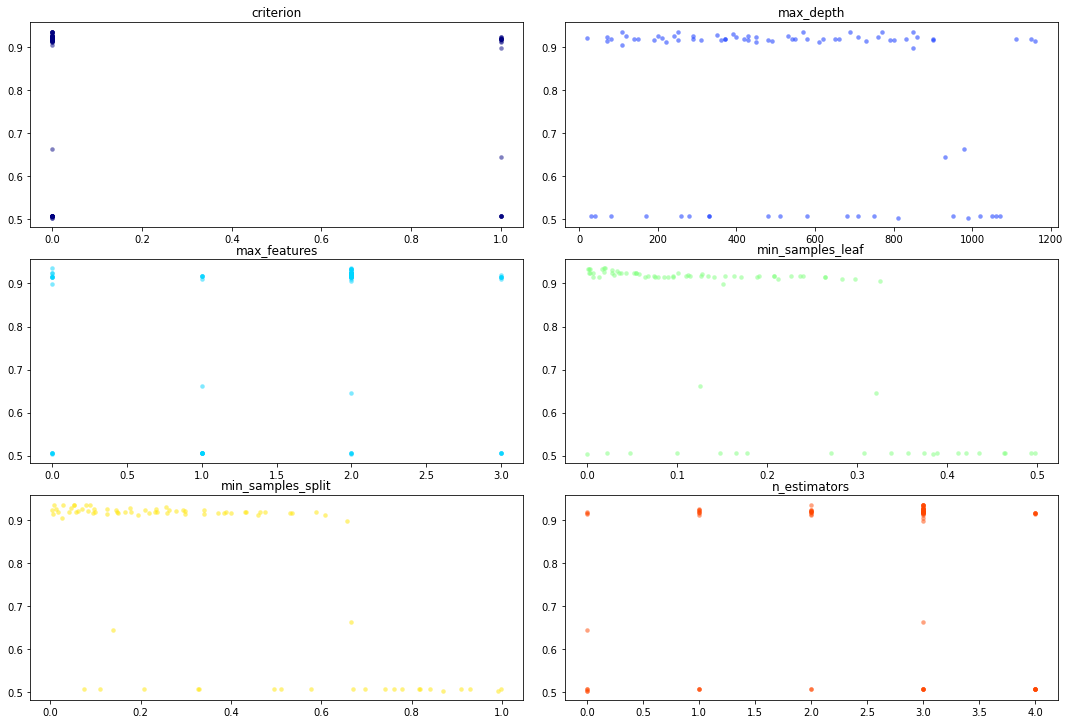

In [19]:
import matplotlib.pyplot as plt

parameters = ['criterion', 'max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split',
              'n_estimators']
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
f.tight_layout()
cmap = plt.cm.jet
for i, val in enumerate(parameters):
    print(i, val)
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    axes[i//2,i%2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.5, c=cmap(float(i)/len(parameters)))
    axes[i//2,i%2].set_title(val)

In [20]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200}

print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

entropy
log2
750


In [21]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc5 = accuracy_score(Y_Test,predictionforest)

[[114   2]
 [  8 116]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       116
           1       0.98      0.94      0.96       124

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240



In [0]:
parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

In [24]:
# Genetic algorithms:

!pip install TPOT
from tpot import TPOTClassifier
from deap.gp import Primitive


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_Train,Y_Train)

Generation 1 - Current best internal CV score: 0.9375
Generation 2 - Current best internal CV score: 0.9410714285714286
Generation 3 - Current best internal CV score: 0.9410714285714286
Generation 4 - Current best internal CV score: 0.9410714285714286
Generation 5 - Current best internal CV score: 0.9410714285714286

Best pipeline: RandomForestClassifier(RandomForestClassifier(RandomForestClassifier(input_matrix, criterion=gini, max_depth=406, max_features=auto, min_samples_leaf=12, min_samples_split=5, n_estimators=617), criterion=entropy, max_depth=274, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1200), criterion=entropy, max_depth=671, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=617)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      142,
                                                                                      274,
                                                                                      406,
                                                                                      538,
                                                                                      671,
                                                                                      803,
                                                                                      935,
                                                                                 

In [25]:
acc6 = tpot_classifier.score(X_Test, Y_Test)
print(acc6)

0.9375


In [0]:
args = {}
for arg in tpot_classifier._optimized_pipeline:
    if type(arg) != Primitive:
        try:
            if arg.value.split('__')[1].split('=')[0] in ['criterion', 'max_depth', 
                                                          'max_features', 'min_samples_leaf', 
                                                          'min_samples_split',
                                                          'n_estimators']:
                args[arg.value.split('__')[1].split('=')[0]] = int(arg.value.split('__')[1].split('=')[1])
            else:
                args[arg.value.split('__')[1].split('=')[0]] = float(arg.value.split('__')[1].split('=')[1])
        except:
            pass
params = args

In [27]:
model = RandomForestClassifier( max_depth = params['max_depth'],
                             min_samples_leaf = params['min_samples_leaf'],
                             min_samples_split = params['min_samples_split'],
                             n_estimators = params['n_estimators'], 
                             )
model.fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
accuracy_score(Y_Test,predictionforest)

[[115   1]
 [  8 116]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       116
           1       0.99      0.94      0.96       124

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240



0.9625

In [28]:
# Artificial Neural Network tuning:

%tensorflow_version 1.x
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

def DL_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim= 4, activation= activation))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

# Definying grid parameters
activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
neurons = [5, 10, 15, 25, 35, 50]
optimizer = ['SGD', 'Adam', 'Adamax']
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

clf = KerasClassifier(build_fn= DL_Model, epochs= 80, batch_size=40, verbose= 0)

model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)
model.fit(X_Train,Y_Train)

print("Max Accuracy Registred: {} using {}".format(round(model.best_score_,3), model.best_params_))
acc = model.cv_results_['mean_test_score']
hyper = model.cv_results_['params']

for mean, param in zip(acc, hyper):
    print("Overall accuracy of {} % using: {}".format(round(mean, 3), param))

TensorFlow 1.x selected.


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Max Accuracy Registred: 0.93 using {'activation': 'linear', 'neurons': 25, 'optimizer': 'Adam'}
Overall accuracy of 0.546 % using: {'activation': 'softmax', 'neurons': 5, 'optimizer': 'SGD'}
Overall accuracy of 0.895 % using: {'activation': 'softmax', 'neurons': 5, 'optimizer': 'Adam'}
Overall accuracy of 0.888 % using: {'activation': 'softmax', 'neurons': 5, 'optimizer': 'Adamax'}
Overall accuracy of 0.537 % using: {'activation': 'softmax', 'neurons': 10, 'optimizer': 'SGD'}
Overall accuracy of 0.898 % using: {'activation': 'softmax', 'neurons': 10, 'optimizer': 'Adam'}
Overall accuracy of 0.88 % using: {'activation': 'softmax', 'neurons': 10, 'optimizer': 'Adamax'}
Overall accuracy of 0.507 % using: {'activation': 'softmax', 'neurons': 15, 'optimizer': 'SGD'}
Overa

In [29]:
predictionforest = model.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc7 = accuracy_score(Y_Test,predictionforest)

[[114   2]
 [ 11 113]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       116
           1       0.98      0.91      0.95       124

    accuracy                           0.95       240
   macro avg       0.95      0.95      0.95       240
weighted avg       0.95      0.95      0.95       240



In [31]:
print('Base Accuracy vs Manual Search {:0.4f}%.'.format( 100 * (acc2 - acc1) / acc1))
print('Base Accuracy vs Random Search {:0.4f}%.'.format( 100 * (acc3 - acc1) / acc1))
print('Base Accuracy vs Grid Search {:0.4f}%.'.format( 100 * (acc4 - acc1) / acc1))
print('Base Accuracy vs Bayesian Optimization Accuracy {:0.4f}%.'.format( 100 * (acc5 - acc1) / acc1))
print('Base Accuracy vs Evolutionary Algorithms {:0.4f}%.'.format( 100 * (acc6 - acc1) / acc1))
print('Base Accuracy vs Optimized ANN {:0.4f}%.'.format( 100 * (acc7 - acc1) / acc1))

Base Accuracy vs Manual Search -2.1459%.
Base Accuracy vs Random Search -0.4292%.
Base Accuracy vs Grid Search 0.0000%.
Base Accuracy vs Bayesian Optimization Accuracy -1.2876%.
Base Accuracy vs Evolutionary Algorithms -3.4335%.
Base Accuracy vs Optimized ANN -2.5751%.
